## Data loading and initial inspection


In [ ]:
import pandas as pd
import numpy as np
import hashlib
from datetime import datetime

# Load the Excel file into a pandas DataFrame
df = pd.read_excel("custom-import_data.xlsx")

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
display(df.head())

# Print the column names and their data types
print("\nColumn names and data types:")
print(df.info())

# Get a summary of the DataFrame, including non-null values
print("\nSummary of the DataFrame:")
display(df.describe(include='all'))

# Look for obvious anomalies in the 'Receipt Date' column
# This involves checking the data type and looking for non-date entries if the type is object
print("\nChecking 'Receipt Date' column for anomalies:")
print(df['Receipt Date'].dtype)
# Further inspection for non-date values will be done in the cleaning step if the dtype is object or if errors occur during conversion.

First few rows of the DataFrame:


,ID,Custom Office,Reg Number,Importer,HS Code,FOB Value (N),CIF Value (N),Total Tax(N),Receipt Number,Receipt Date,Mass(KG),Country of Origin,Country of Supply,Nbr Of Containers,Container Nbr,Container Size
0,0,UA PORT,C1195,29143,12900000,1046575,1119220,137105,R599,03/07/1866,126,Germany,NaN,0,NaN,NaN
1,1,UA PORT,C1195,29143,36700000,216957,232002,68365,R599,03/07/1866,26,Germany,NaN,0,NaN,NaN
2,2,UA PORT,C1195,29143,39390000,172037,183858,54415,R599,03/07/1866,21,Germany,NaN,0,NaN,NaN
3,3,UA PORT,C1277,62056,40890000,776007,915286,162868,R621,03/08/1866,71,Belgium,Belgium,0,NaN,NaN
4,4,UA PORT,C1292,93763,37100000,234651,301040,37415,R614,03/08/1866,45,Turkey,Turkey,0,NaN,NaN



Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  77789 non-null  int64 
 1   Custom Office       77789 non-null  object
 2   Reg Number          77789 non-null  object
 3   Importer            77789 non-null  int64 
 4   HS Code             77789 non-null  int64 
 5   FOB Value (N)       77789 non-null  int64 
 6   CIF Value (N)       77789 non-null  int64 
 7   Total Tax(N)        77789 non-null  int64 
 8   Receipt Number      76493 non-null  object
 9   Receipt Date        76493 non-null  object
 10  Mass(KG)            77789 non-null  int64 
 11  Country  of Origin  77789 non-null  object
 12  Country  of Supply  76826 non-null  object
 13  Nbr Of Containers   77789 non-null  int64 
 14  Container Nbr       45436 non-null  object
 15  Container Size      45436 non-null  obje

,ID,Custom Office,Reg Number,Importer,HS Code,FOB Value (N),CIF Value (N),Total Tax(N),Receipt Number,Receipt Date,Mass(KG),Country of Origin,Country of Supply,Nbr Of Containers,Container Nbr,Container Size
count,77789.000000,77789,77789,77789.000000,7.778900e+04,7.778900e+04,7.778900e+04,7.778900e+04,76493,76493,7.778900e+04,77789,76826,7.778900e+04,45436,45436
unique,NaN,15,43661,NaN,NaN,NaN,NaN,NaN,42977,384,NaN,138,130,NaN,36273,57
top,NaN,HM CARGO,C50710,NaN,NaN,NaN,NaN,NaN,R54402,19/01/1866,NaN,China,China,NaN,JBNU7718000,45G1
freq,NaN,27619,91,NaN,NaN,NaN,NaN,NaN,90,520,NaN,27222,25436,NaN,27,8923
mean,38894.000000,NaN,NaN,52151.593683,2.277066e+07,2.319237e+07,2.478246e+07,3.246356e+06,NaN,NaN,1.748563e+04,NaN,NaN,4.381915e+01,NaN,NaN
std,22455.894382,NaN,NaN,27061.574052,1.379329e+07,9.485749e+07,9.873086e+07,1.305554e+07,NaN,NaN,9.817176e+04,NaN,NaN,1.164717e+04,NaN,NaN
min,0.000000,NaN,NaN,4.000000,1.100000e+06,1.797000e+03,1.797000e+03,1.600000e+03,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN
25%,19447.000000,NaN,NaN,31063.000000,1.220000e+07,1.640910e+05,2.017520e+05,3.193900e+04,NaN,NaN,5.000000e+01,NaN,NaN,0.000000e+00,NaN,NaN
50%,38894.000000,NaN,NaN,56780.000000,1.850000e+07,1.193191e+06,1.447186e+06,2.002030e+05,NaN,NaN,1.300000e+03,NaN,NaN,1.000000e+00,NaN,NaN
75%,58341.000000,NaN,NaN,72101.000000,3.649000e+07,6.794800e+06,8.077959e+06,9.758730e+05,NaN,NaN,1.000000e+04,NaN,NaN,1.000000e+00,NaN,NaN



Checking 'Receipt Date' column for anomalies:
object


In [ ]:
# Display current column names
print("Current column names:")
print(df.columns)

Current column names:
Index(['ID', 'Custom Office', 'Reg Number', 'Importer', 'HS Code',
       'FOB Value (N)', 'CIF Value (N)', 'Total Tax(N)', 'Receipt Number',
       'Receipt Date', 'Mass(KG)', 'Country  of Origin', 'Country  of Supply',
       'Nbr Of Containers', 'Container Nbr', 'Container Size'],
      dtype='object')


In [ ]:
# Create a dictionary for renaming columns
new_column_names = {
    'Custom Office': 'Custom_Office',
    'Reg Number': 'Reg_Number',
    'HS Code': 'HS_Code',
    'FOB Value (N)': 'FOB_Value_N',
    'CIF Value (N)': 'CIF_Value_N',
    'Total Tax(N)': 'Total_Tax_N',
    'Receipt Number': 'Receipt_Number',
    'Receipt Date': 'Receipt_Date',
    'Mass(KG)': 'Mass_KG',
    'Country  of Origin': 'Country_of_Origin',
    'Country  of Supply': 'Country_of_Supply',
    'Nbr Of Containers': 'Nbr_Of_Containers',
    'Container Nbr': 'Container_Nbr',
    'Container Size': 'Container_Size'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Display the new column names to confirm
print("\nNew column names:")
print(df.columns)


New column names:
Index(['ID', 'Custom_Office', 'Reg_Number', 'Importer', 'HS_Code',
       'FOB_Value_N', 'CIF_Value_N', 'Total_Tax_N', 'Receipt_Number',
       'Receipt_Date', 'Mass_KG', 'Country_of_Origin', 'Country_of_Supply',
       'Nbr_Of_Containers', 'Container_Nbr', 'Container_Size'],
      dtype='object')


In [ ]:
# Identify columns with missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID                       0
Custom_Office            0
Reg_Number               0
Importer                 0
HS_Code                  0
FOB_Value_N              0
CIF_Value_N              0
Total_Tax_N              0
Receipt_Number        1296
Receipt_Date          1296
Mass_KG                  0
Country_of_Origin        0
Country_of_Supply      963
Nbr_Of_Containers        0
Container_Nbr        32353
Container_Size       32353
dtype: int64


In [ ]:
# Drop rows with missing values in 'Receipt_Number' and 'Receipt_Date'
df.dropna(subset=['Receipt_Number', 'Receipt_Date'], inplace=True)

# Fill missing values in 'Country_of_Supply' with values from 'Country_of_Origin'
df['Country_of_Supply'].fillna(df['Country_of_Origin'], inplace=True)

# Verify the changes by checking for missing values again
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
ID                       0
Custom_Office            0
Reg_Number               0
Importer                 0
HS_Code                  0
FOB_Value_N              0
CIF_Value_N              0
Total_Tax_N              0
Receipt_Number           0
Receipt_Date             0
Mass_KG                  0
Country_of_Origin        0
Country_of_Supply        0
Nbr_Of_Containers        0
Container_Nbr        31636
Container_Size       31636
dtype: int64


/tmp/ipython-input-3459318261.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_of_Supply'].fillna(df['Country_of_Origin'], inplace=True)


In [ ]:
# Impute Container_Nbr and Container_Size with 'None' where Nbr_Of_Containers is 0 or null
# First, handle potential nulls in Nbr_Of_Containers by filling with 0 (assuming null means 0 containers)
df['Nbr_Of_Containers'] = df['Nbr_Of_Containers'].fillna(0)

# Now, impute Container_Nbr and Container_Size where Nbr_Of_Containers is 0
mask_no_containers = df['Nbr_Of_Containers'] == 0
df.loc[mask_no_containers, 'Container_Nbr'] = 'None'
df.loc[mask_no_containers, 'Container_Size'] = 'None'

# Drop remaining rows with missing values in 'Container_Nbr' and 'Container_Size'
df.dropna(subset=['Container_Nbr', 'Container_Size'], inplace=True)

# Verify the changes
print("\nMissing values after imputation and feature creation:")
print(df.isnull().sum())

print("\nChecking correlation between imputed values and Nbr_Of_Containers = 0:")
# Re-create mask after dropping rows
mask_no_containers = df['Nbr_Of_Containers'] == 0
print(df[mask_no_containers][['Nbr_Of_Containers', 'Container_Nbr', 'Container_Size']].head())

print("\nShape of the DataFrame after dropping remaining missing values:")
print(df.shape)


Missing values after imputation and feature creation:
ID                    0
Custom_Office         0
Reg_Number            0
Importer              0
HS_Code               0
FOB_Value_N           0
CIF_Value_N           0
Total_Tax_N           0
Receipt_Number        0
Receipt_Date          0
Mass_KG               0
Country_of_Origin     0
Country_of_Supply     0
Nbr_Of_Containers     0
Container_Nbr         0
Container_Size        0
Is_High_Value         0
Tax_to_Value_Ratio    0
Is_Suspicious_Tax     0
FOB_CIF_Diff          0
Tax_per_KG            0
HS_Code_Category      0
Tax_to_FOB_Ratio      0
Has_Containers        0
Shipment_Type         0
Mass_Category         0
YearMonth             0
dtype: int64

Checking correlation between imputed values and Nbr_Of_Containers = 0:
   Nbr_Of_Containers Container_Nbr Container_Size
0                  0          None           None
1                  0          None           None
2                  0          None           None
3           

In [ ]:
# 1. Fix Receipt Dates
# Replace years < 1900 with 2023-2024 (e.g., 1866 -> 2023)
df['Receipt_Date'] = pd.to_datetime(df['Receipt_Date'], errors='coerce', dayfirst=True)

# Shift any year before 1900 to the correct range by mapping 1866->2023
df['Receipt_Date'] = df['Receipt_Date'].apply(
    lambda x: x.replace(year=2023 + (x.year - 1866)) if pd.notnull(x) and x.year < 1900 else x
)
print("First few rows of 'Receipt_Date':")
print(df['Receipt_Date'].head())

print("\nYear counts:")
print(df['Receipt_Date'].dt.year.value_counts().sort_index())

First few rows of 'Receipt_Date':
0   2023-07-03
1   2023-07-03
2   2023-07-03
3   2023-08-03
4   2023-08-03
Name: Receipt_Date, dtype: datetime64[ns]

Year counts:
Receipt_Date
2023    72975
2024     1569
2025       38
2026       60
Name: count, dtype: int64


In [ ]:
# 5. Truncate HS Codes to 6 digits
df['HS_Code'] = df['HS_Code'].astype(str).str.zfill(6).str[:6]
print("\nHS Code Lengths After Truncation:")
print(df['HS_Code'].str.len().value_counts())


HS Code Lengths After Truncation:
HS_Code
6    74642
Name: count, dtype: int64


In [ ]:
# 7. Check for negative values
negatives = df[['FOB_Value_N', 'CIF_Value_N', 'Total_Tax_N', 'Mass_KG']].lt(0).sum()
print("\nNegative Values:", negatives)
df = df[(df['FOB_Value_N'] >= 0) & (df['CIF_Value_N'] >= 0) & (df['Total_Tax_N'] >= 0) & (df['Mass_KG'] >= 0)]


Negative Values: FOB_Value_N    0
CIF_Value_N    0
Total_Tax_N    0
Mass_KG        0
dtype: int64


In [ ]:
import numpy as np
# 9. Handle outliers
# Flag CIF > 99th percentile
cif_99 = df['CIF_Value_N'].quantile(0.99)
df['Is_High_Value'] = (df['CIF_Value_N'] > cif_99).astype(int)
# Flag suspicious tax (Total Tax = 1600 or Tax_to_Value_Ratio < 1st percentile)
df['Tax_to_Value_Ratio'] = df['Total_Tax_N'] / df['CIF_Value_N'].replace(0, np.nan)
tax_ratio_q1 = df['Tax_to_Value_Ratio'].quantile(0.01)
df['Is_Suspicious_Tax'] = ((df['Total_Tax_N'] == 1600) | (df['Tax_to_Value_Ratio'] < tax_ratio_q1)).astype(int)
# Remove extreme outliers (CIF > 99.9th percentile)
cif_999 = df['CIF_Value_N'].quantile(0.999)
df = df[df['CIF_Value_N'] <= cif_999]
print("\nShape After Removing CIF Outliers:", df.shape)


Shape After Removing CIF Outliers: (74589, 27)


### Feature Engineering


In [ ]:
# 10. Feature Engineering for KPIs and Policy Simulation
# Tax-to-Value Ratio (already calculated)
# FOB-CIF Difference
df['FOB_CIF_Diff'] = df['CIF_Value_N'] - df['FOB_Value_N']
# Tax per KG
df['Tax_per_KG'] = df['Total_Tax_N'] / (df['Mass_KG'].replace(0, np.nan))
# HS Code Category (first 2 digits) and map to product description
hs_code_category_mapping = {
    '17': 'Sugars and sugar confectionery',
    '28': 'Inorganic chemicals',
    '44': 'Wood and articles of wood',
    '37': 'Photographic goods',
    '41': 'Raw hides and skins',
    '13': 'Lac',
    '32': 'Dyeing extracts',
    '21': 'Miscellaneous edible preparations',
    '36': 'Explosives',
    '09': 'Coffee, tea and spices',
    '72': 'Iron and steel',
    '84': 'Nuclear reactors',
    '85': 'Electrical machinery'
}
df['HS_Code_Category'] = df['HS_Code'].astype(str).str.zfill(6).str[:2].map(hs_code_category_mapping).fillna('Other') # Added fillna('Other')

# Tax-to-FOB Ratio
df['Tax_to_FOB_Ratio'] = df['Total_Tax_N'] / (df['FOB_Value_N'].replace(0, np.nan))
# Has Containers
df['Has_Containers'] = (df['Nbr_Of_Containers'] > 0).astype(int)

# Create a binary feature Has_Containers
df['Has_Containers'] = (df['Nbr_Of_Containers'] > 0).astype(int)

# Shipment Type
df['Shipment_Type'] = df['Has_Containers'].map({1: 'Containerized', 0: 'Non-Containerized'})

# Mass Category
def categorize_mass(mass):
    if mass < 100:
        return 'Low'
    elif mass <= 1000:
        return 'Medium'
    else:
        return 'High'
df['Mass_Category'] = df['Mass_KG'].apply(categorize_mass)

# Display the first few rows with the new features
print("\nDataFrame with new features:")
display(df[['Nbr_Of_Containers', 'Container_Nbr', 'FOB_Value_N', 'CIF_Value_N', 'FOB_CIF_Diff', 'Total_Tax_N', 'Mass_KG','Mass_Category','Tax_per_KG', 'HS_Code', 'HS_Code_Category', 'Tax_to_FOB_Ratio', 'Has_Containers', 'Shipment_Type']].head())


DataFrame with new features:


,Nbr_Of_Containers,Container_Nbr,FOB_Value_N,CIF_Value_N,FOB_CIF_Diff,Total_Tax_N,Mass_KG,Mass_Category,Tax_per_KG,HS_Code,HS_Code_Category,Tax_to_FOB_Ratio,Has_Containers,Shipment_Type
0,0,None,1046575,1119220,72645,137105,126,Medium,1088.134921,129000,Other,0.131004,0,Non-Containerized
1,0,None,216957,232002,15045,68365,26,Low,2629.423077,367000,Explosives,0.315109,0,Non-Containerized
2,0,None,172037,183858,11821,54415,21,Low,2591.190476,393900,Other,0.316298,0,Non-Containerized
3,0,None,776007,915286,139279,162868,71,Low,2293.915493,408900,Other,0.209880,0,Non-Containerized
4,0,None,234651,301040,66389,37415,45,Low,831.444444,371000,Photographic goods,0.159450,0,Non-Containerized


In [ ]:
# Save cleaned dataset
df.to_csv('cleaned_customs_data.csv', index=False)
print("\nSaved cleaned dataset to 'cleaned_customs_data.csv'")


Saved cleaned dataset to 'cleaned_customs_data.csv'


In [ ]:
pd.read_csv('cleaned_customs_data.csv').head()

,ID,Custom_Office,Reg_Number,Importer,HS_Code,FOB_Value_N,CIF_Value_N,Total_Tax_N,Receipt_Number,Receipt_Date,...,Is_High_Value,Tax_to_Value_Ratio,Is_Suspicious_Tax,FOB_CIF_Diff,Tax_per_KG,HS_Code_Category,Tax_to_FOB_Ratio,Has_Containers,Shipment_Type,Mass_Category
0,0,UA PORT,C1195,29143,129000,1046575,1119220,137105,R599,2023-07-03,...,0,0.122500,0,72645,1088.134921,Other,0.131004,0,Non-Containerized,Medium
1,1,UA PORT,C1195,29143,367000,216957,232002,68365,R599,2023-07-03,...,0,0.294674,0,15045,2629.423077,Explosives,0.315109,0,Non-Containerized,Low
2,2,UA PORT,C1195,29143,393900,172037,183858,54415,R599,2023-07-03,...,0,0.295962,0,11821,2591.190476,Other,0.316298,0,Non-Containerized,Low
3,3,UA PORT,C1277,62056,408900,776007,915286,162868,R621,2023-08-03,...,0,0.177942,0,139279,2293.915493,Other,0.209880,0,Non-Containerized,Low
4,4,UA PORT,C1292,93763,371000,234651,301040,37415,R614,2023-08-03,...,0,0.124286,0,66389,831.444444,Photographic goods,0.159450,0,Non-Containerized,Low


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load cleaned dataset
print("Loading cleaned dataset...")
try:
    df = pd.read_csv('cleaned_customs_data.csv', parse_dates=['Receipt_Date'])
except FileNotFoundError:
    print("Error: 'cleaned_customs_data.csv' not found.")
    exit()

# Verify dataset
print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isna().sum())
print("\nSummary Statistics:")


Loading cleaned dataset...

Dataset Shape: (76352, 26)

Missing Values:
ID                        0
Custom_Office             0
Reg_Number                0
Importer                  0
HS_Code                   0
FOB_Value_N               0
CIF_Value_N               0
Total_Tax_N               0
Receipt_Number            0
Receipt_Date              0
Mass_KG                   0
Country_of_Origin         0
Country_of_Supply         0
Nbr_Of_Containers         0
Container_Nbr         31567
Container_Size        31567
Is_High_Value             0
Tax_to_Value_Ratio        0
Is_Suspicious_Tax         0
FOB_CIF_Diff              0
Tax_per_KG             1710
HS_Code_Category          0
Tax_to_FOB_Ratio          0
Has_Containers            0
Shipment_Type             0
Mass_Category             0
dtype: int64

Summary Statistics:


In [ ]:
# Drop rows where 'Tax_per_KG' is null/NaN
df.dropna(subset=['Tax_per_KG'], inplace=True)

# Verify the changes
print("\nMissing values after dropping rows with null Tax_per_KG:")
print(df.isnull().sum())

print("\nShape of the DataFrame after dropping rows with null Tax_per_KG:")
print(df.shape)


Missing values after dropping rows with null Tax_per_KG:
ID                        0
Custom_Office             0
Reg_Number                0
Importer                  0
HS_Code                   0
FOB_Value_N               0
CIF_Value_N               0
Total_Tax_N               0
Receipt_Number            0
Receipt_Date              0
Mass_KG                   0
Country_of_Origin         0
Country_of_Supply         0
Nbr_Of_Containers         0
Container_Nbr         29878
Container_Size        29878
Is_High_Value             0
Tax_to_Value_Ratio        0
Is_Suspicious_Tax         0
FOB_CIF_Diff              0
Tax_per_KG                0
HS_Code_Category          0
Tax_to_FOB_Ratio          0
Has_Containers            0
Shipment_Type             0
Mass_Category             0
dtype: int64

Shape of the DataFrame after dropping rows with null Tax_per_KG:
(74642, 26)


## Key Performance Indicators (KPIs)

In [ ]:
# Compute KPIs
kpis = {}

# Import Volume and Value
kpis['Total_FOB'] = df['FOB_Value_N'].sum()
kpis['Total_CIF'] = df['CIF_Value_N'].sum()
kpis['Avg_FOB'] = df['FOB_Value_N'].mean()
kpis['Avg_CIF'] = df['CIF_Value_N'].mean()
kpis['Top_7_Countries_CIF'] = df.groupby('Country_of_Origin')['CIF_Value_N'].sum().nlargest(7)
kpis['Top_7_Importers_Mass'] = df.groupby('Importer')['Mass_KG'].sum().nlargest(7)
kpis['Avg_Mass'] = df['Mass_KG'].mean()

# Taxation and Revenue KPIs
kpis['Total_Tax'] = df['Total_Tax_N'].sum()
kpis['Avg_Tax'] = df['Total_Tax_N'].mean()
kpis['Avg_Tax_to_Value_Ratio'] = df['Tax_to_Value_Ratio'].mean()
# Assuming 'Importer' is the column for importer identifiers
kpis['Top_5_Importers_Tax'] = df.groupby('Importer')['Total_Tax_N'].sum().nlargest(5)
kpis['Pct_Suspicious_Tax'] = df['Is_Suspicious_Tax'].mean() * 100

# Logistics and Shipment KPIs
kpis['Total_Shipments'] = len(df)
kpis['Total_Mass_by_Country'] = df.groupby('Country_of_Origin')['Mass_KG'].sum().nlargest(5)
# Compute Common_Container_Size only for rows where Container_Size is not 'None'
# Check if there are any non-'None' container sizes before computing mode
if (df['Container_Size'] != 'None').any():
    kpis['Common_Container_Size'] = df[df['Container_Size'] != 'None']['Container_Size'].mode()[0]
else:
    kpis['Common_Container_Size'] = 'None (No containerized shipments with specified size)'

# Compliance and Processing
kpis['Transactions_per_Office'] = df.groupby('Custom_Office')['ID'].count()
kpis['Top_5_HS_Code_Category_Count'] = df.groupby('HS_Code_Category')['ID'].count().nlargest(5)
kpis['Top_5_HS_Code_Category_CIF'] = df.groupby('HS_Code_Category')['CIF_Value_N'].sum().nlargest(5)
kpis['Pct_High_Value'] = df['Is_High_Value'].mean() * 100

In [ ]:
# Display KPIs
print("\nKey Performance Indicators (KPIs):")
for key, value in kpis.items():
    if isinstance(value, pd.Series):
        print(f"\n{key}:")
        print(value)
    elif isinstance(value, str):
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:,.2f}")


Key Performance Indicators (KPIs):
Total_FOB: 1,582,457,046,519.00
Total_CIF: 1,696,927,029,970.00
Avg_FOB: 21,200,624.94
Avg_CIF: 22,734,211.70

Top_7_Countries_CIF:
Country_of_Origin
China                 701601089712
India                 108871569898
Italy                 107087588202
United Kingdom         98331728344
Lebanon                97509625379
Korea, Republic of     82415104561
Sweden                 71582201713
Name: CIF_Value_N, dtype: int64

Top_7_Importers_Mass:
Importer
7013     77025030
11327    72083656
30571    68418605
61090    60939646
69009    36276858
96059    30278549
37193    28928351
Name: Mass_KG, dtype: int64
Avg_Mass: 17,667.15
Total_Tax: 242,105,676,071.00
Avg_Tax: 3,243,558.27
Avg_Tax_to_Value_Ratio: 0.19

Top_5_Importers_Tax:
Importer
69009    28686328399
37193    24644875768
96059    16052822615
11327    13348995427
94060    11119146632
Name: Total_Tax_N, dtype: int64
Pct_Suspicious_Tax: 1.05
Total_Shipments: 74,642.00

Total_Mass_by_Country:
Countr

In [ ]:
# Save KPIs to CSV
kpi_df = pd.DataFrame({key: [value] for key, value in kpis.items() if not isinstance(value, pd.Series)})
kpi_df.to_csv('kpis.csv', index=False)
print("\nSaved KPIs to 'kpis.csv'")


Saved KPIs to 'kpis.csv'


## Visualization of KPIs

/tmp/ipython-input-2724395465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis') # Added color palette


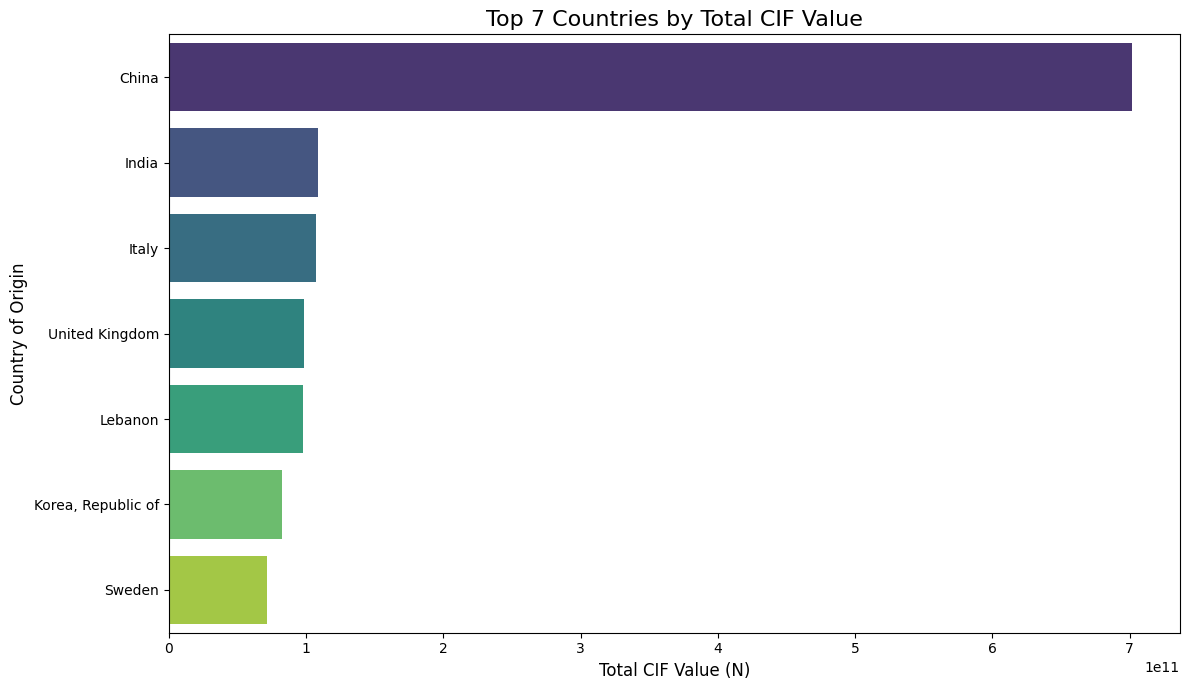

In [ ]:
# Visualizations
# 1. Top 5 Countries by CIF Value
top_countries = kpis['Top_7_Countries_CIF']
plt.figure(figsize=(12, 7)) # Increased figure size
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis') # Added color palette
plt.title('Top 7 Countries by Total CIF Value', fontsize=16) # Improved title
plt.xlabel('Total CIF Value (N)', fontsize=12) # Improved label
plt.ylabel('Country of Origin', fontsize=12) # Added label
plt.tight_layout() # Adjust layout
plt.savefig('top_countries_cif.png')
plt.show()
plt.close()

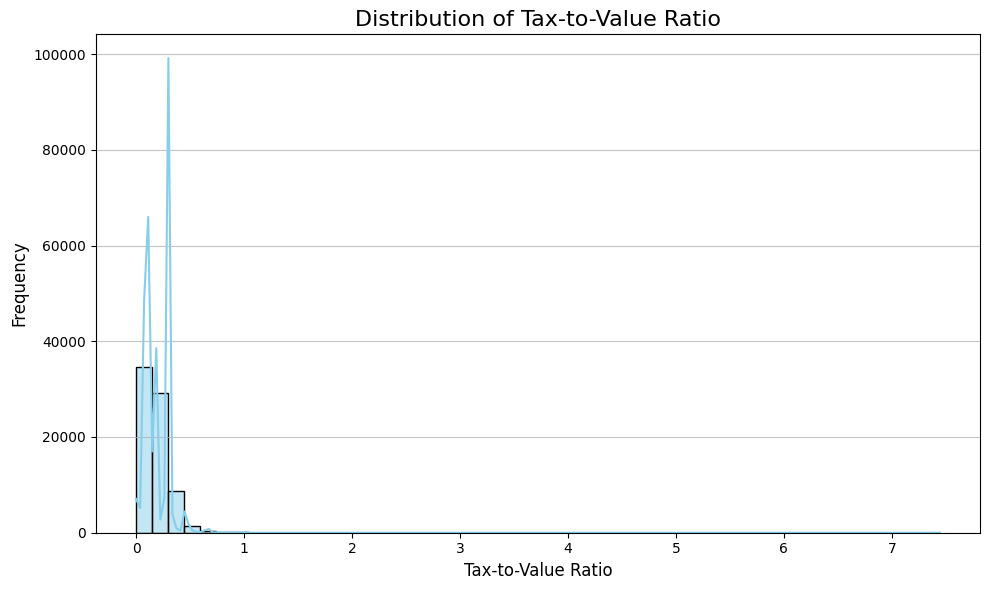

In [ ]:
# 2. Tax-to-Value Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tax_to_Value_Ratio'].dropna(), bins=50, kde=True, color='skyblue') # Added more bins, KDE, and color
plt.title('Distribution of Tax-to-Value Ratio', fontsize=16) # Improved title
plt.xlabel('Tax-to-Value Ratio', fontsize=12) # Improved label
plt.ylabel('Frequency', fontsize=12) # Added label
plt.grid(axis='y', alpha=0.75) # Add grid
plt.tight_layout() # Adjust layout
plt.savefig('tax_to_value_hist.png')
plt.show()
plt.close()

/tmp/ipython-input-2410844098.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hs_cif.values, y=top_hs_cif.index, palette='magma') # Added color palette


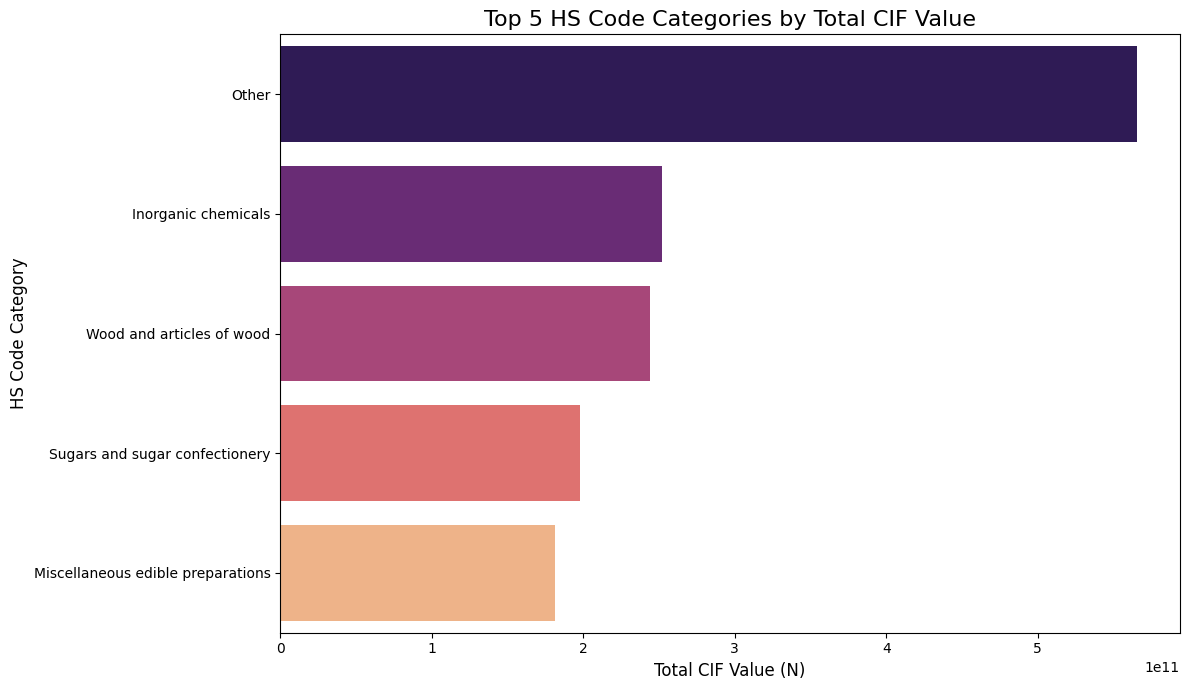

In [ ]:
# 3. Top HS Code Categories by CIF
top_hs_cif = kpis['Top_5_HS_Code_Category_CIF']
plt.figure(figsize=(12, 7)) # Increased figure size
sns.barplot(x=top_hs_cif.values, y=top_hs_cif.index, palette='magma') # Added color palette
plt.title('Top 5 HS Code Categories by Total CIF Value', fontsize=16) # Improved title
plt.xlabel('Total CIF Value (N)', fontsize=12) # Improved label
plt.ylabel('HS Code Category', fontsize=12) # Added label
plt.tight_layout() # Adjust layout
plt.savefig('top_hs_cif.png')
plt.show()
plt.close()

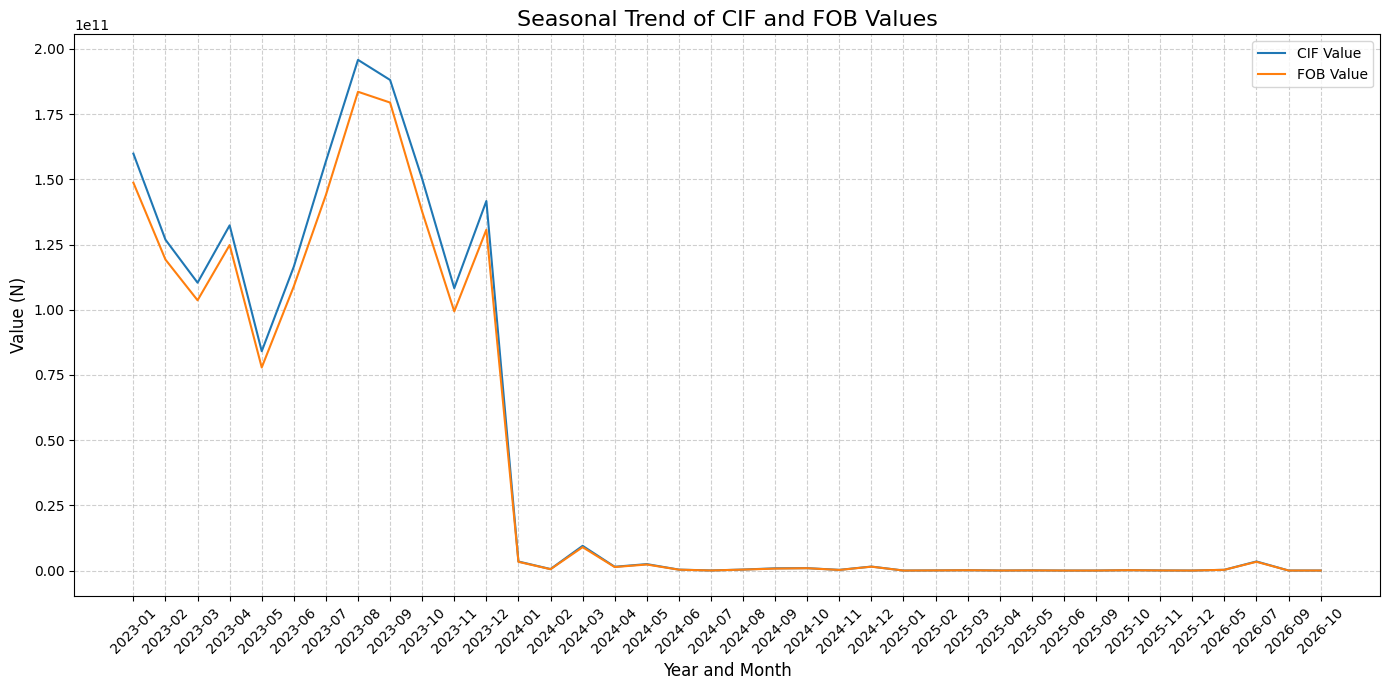

In [ ]:
# 2. Seasonal trend by CIF and imports value
# Extract Year and Month
df['YearMonth'] = df['Receipt_Date'].dt.to_period('M')

# Group by YearMonth and sum CIF and FOB values
seasonal_trend = df.groupby('YearMonth')[['CIF_Value_N', 'FOB_Value_N']].sum().reset_index()

# Convert YearMonth back to datetime for plotting
seasonal_trend['YearMonth'] = seasonal_trend['YearMonth'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=seasonal_trend, x='YearMonth', y='CIF_Value_N', label='CIF Value')
sns.lineplot(data=seasonal_trend, x='YearMonth', y='FOB_Value_N', label='FOB Value')
plt.title('Seasonal Trend of CIF and FOB Values', fontsize=16)
plt.xlabel('Year and Month', fontsize=12)
plt.ylabel('Value (N)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('seasonal_trend_cif_fob.png')
plt.show()
plt.close()

/tmp/ipython-input-2270478817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mass_by_country.values, y=top_mass_by_country.index, palette='viridis')


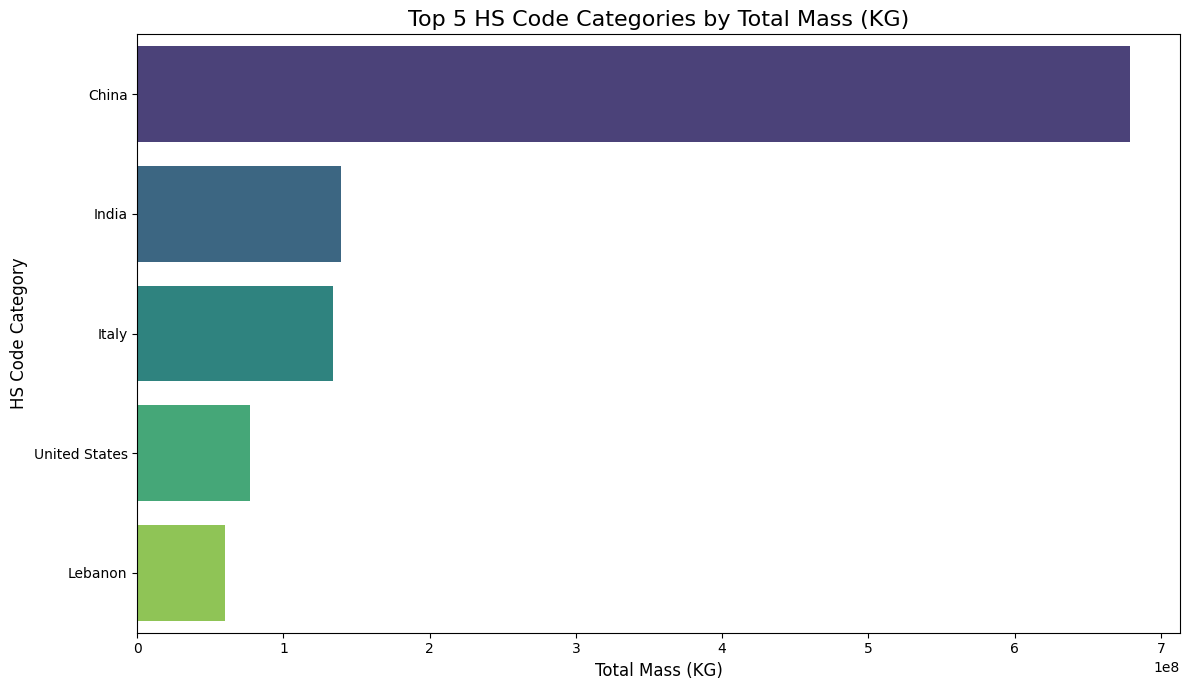

In [ ]:
# 4. Top HS_code_category by Volume (Mass)
top_mass_by_country = kpis['Total_Mass_by_Country']
plt.figure(figsize=(12, 7))
sns.barplot(x=top_mass_by_country.values, y=top_mass_by_country.index, palette='viridis')
plt.title('Top 5 HS Code Categories by Total Mass (KG)', fontsize=16)
plt.xlabel('Total Mass (KG)', fontsize=12)
plt.ylabel('HS Code Category', fontsize=12)
plt.tight_layout()
plt.savefig('top_hs_mass.png')
plt.show()
plt.close()

/tmp/ipython-input-4101169719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importers_tax.values, y=top_importers_tax.index.astype(str), palette='plasma')


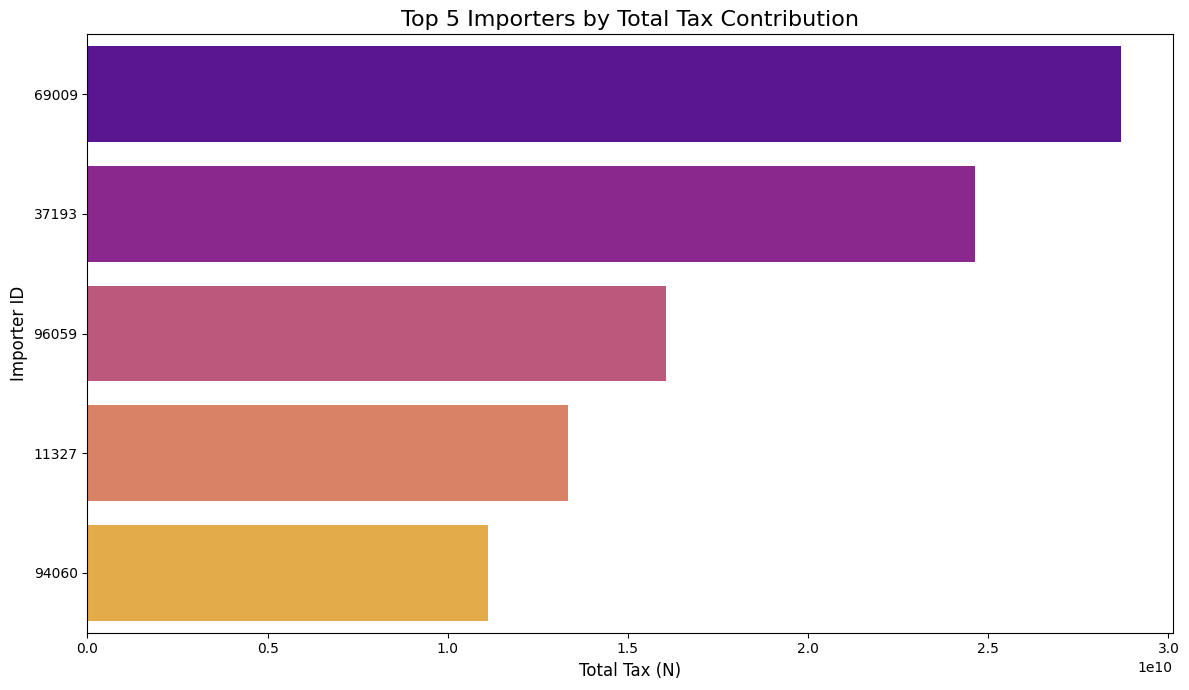

In [ ]:
# 5. Top 5 Importers by Total Tax
top_importers_tax = kpis['Top_5_Importers_Tax']
plt.figure(figsize=(12, 7))
sns.barplot(x=top_importers_tax.values, y=top_importers_tax.index.astype(str), palette='plasma')
plt.title('Top 5 Importers by Total Tax Contribution', fontsize=16)
plt.xlabel('Total Tax (N)', fontsize=12)
plt.ylabel('Importer ID', fontsize=12)
plt.tight_layout()
plt.savefig('top_5_importers_tax.png')
plt.show()
plt.close()

/tmp/ipython-input-2274396443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_mass_7.values, y=top_countries_mass_7.index, palette='viridis')


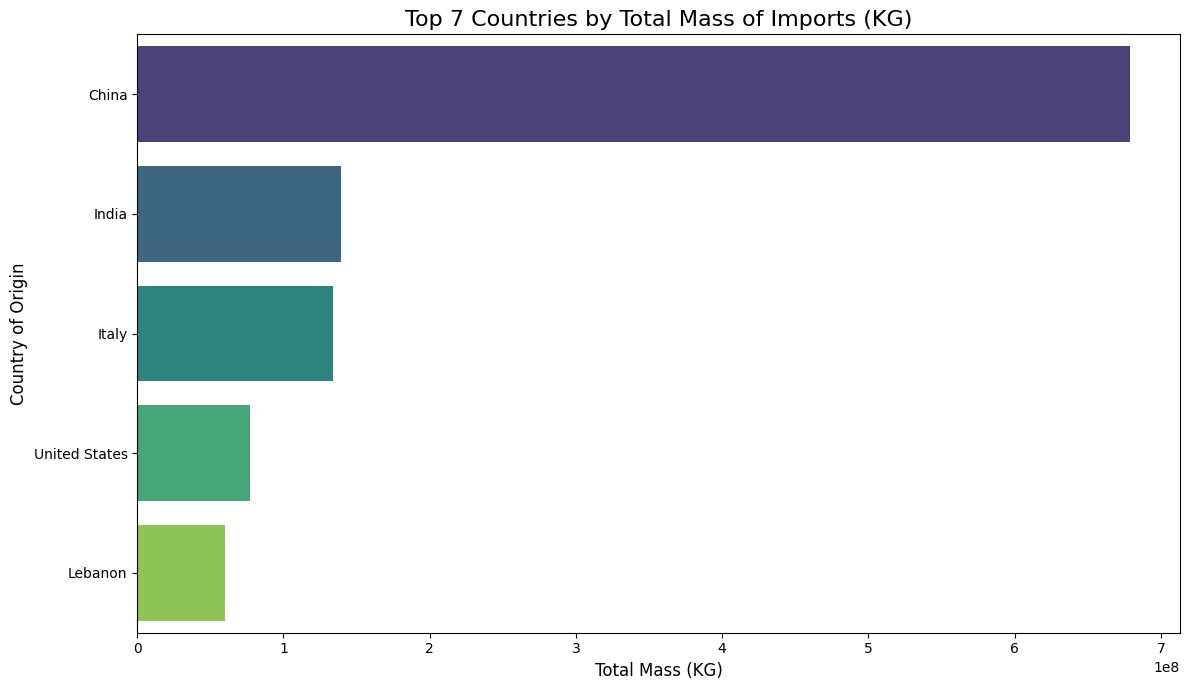

In [ ]:
# 6. Total Mass of Imports by Country of Origin (Top 7)
top_countries_mass_7 = kpis['Total_Mass_by_Country']
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries_mass_7.values, y=top_countries_mass_7.index, palette='viridis')
plt.title('Top 7 Countries by Total Mass of Imports (KG)', fontsize=16)
plt.xlabel('Total Mass (KG)', fontsize=12)
plt.ylabel('Country of Origin', fontsize=12)
plt.tight_layout()
plt.savefig('top_7_countries_mass.png')
plt.show()
plt.close()

/tmp/ipython-input-526480663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_office.values, y=transactions_per_office.index, palette='cubehelix')


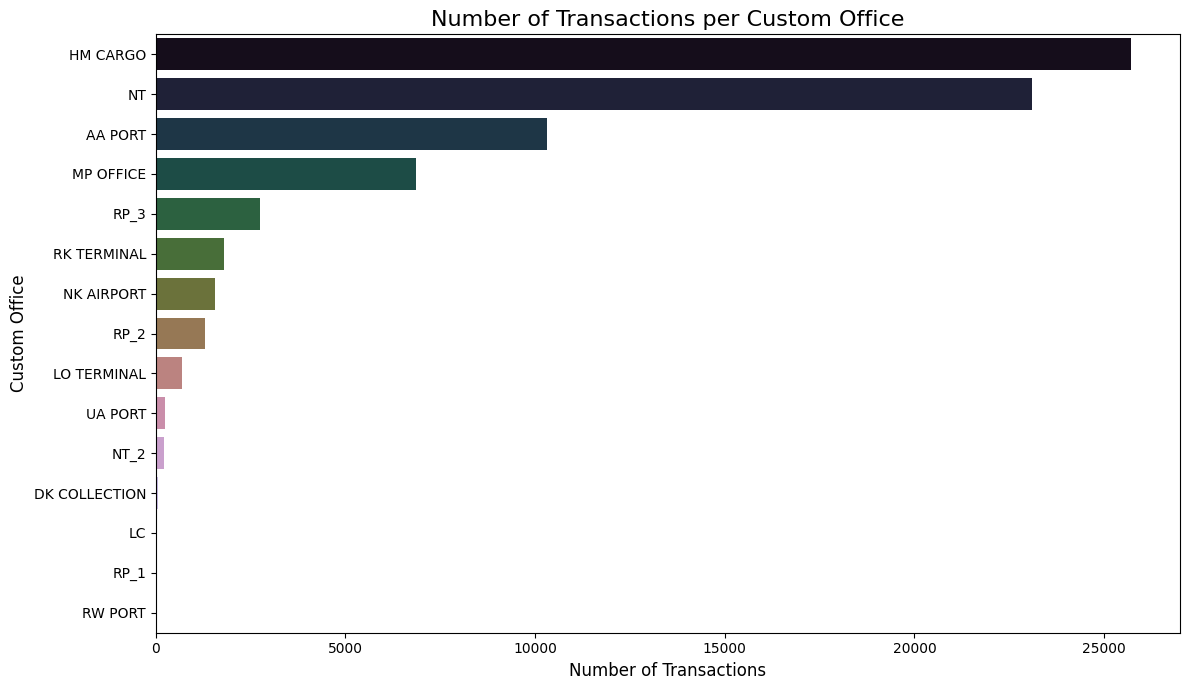

In [ ]:
# 7. Number of Transactions per custom office
transactions_per_office = kpis['Transactions_per_Office'].sort_values(ascending=False) # Sort the values
plt.figure(figsize=(12, 7))
sns.barplot(x=transactions_per_office.values, y=transactions_per_office.index, palette='cubehelix')
plt.title('Number of Transactions per Custom Office', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Custom Office', fontsize=12)
plt.tight_layout()
plt.savefig('transactions_per_office.png')
plt.show()
plt.close()

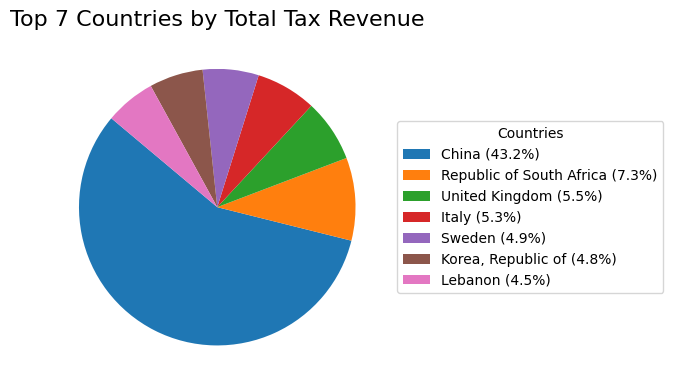

In [ ]:
# 8. Calculate total tax revenue per country
total_tax_by_country = df.groupby('Country_of_Origin')['Total_Tax_N'].sum()

# Select the top 7 countries by tax revenue
top_7_countries_tax = total_tax_by_country.nlargest(7)

# Calculate percentages
total_tax_all = total_tax_by_country.sum()
percentages = (top_7_countries_tax / total_tax_all) * 100

# Create labels for the pie chart (country and percentage)
labels = [f'{country} ({percentage:.1f}%)' for country, percentage in zip(top_7_countries_tax.index, percentages)]

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(top_7_countries_tax, labels=None, autopct='', startangle=140)

# Add legend with country names and percentages
plt.legend(labels, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Top 7 Countries by Total Tax Revenue', fontsize=16)
plt.tight_layout()
plt.savefig('top_7_countries_tax_pie_chart.png')
plt.show()
plt.close()

/tmp/ipython-input-3614588249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=container_sizes.values, y=container_sizes.index, palette='viridis')


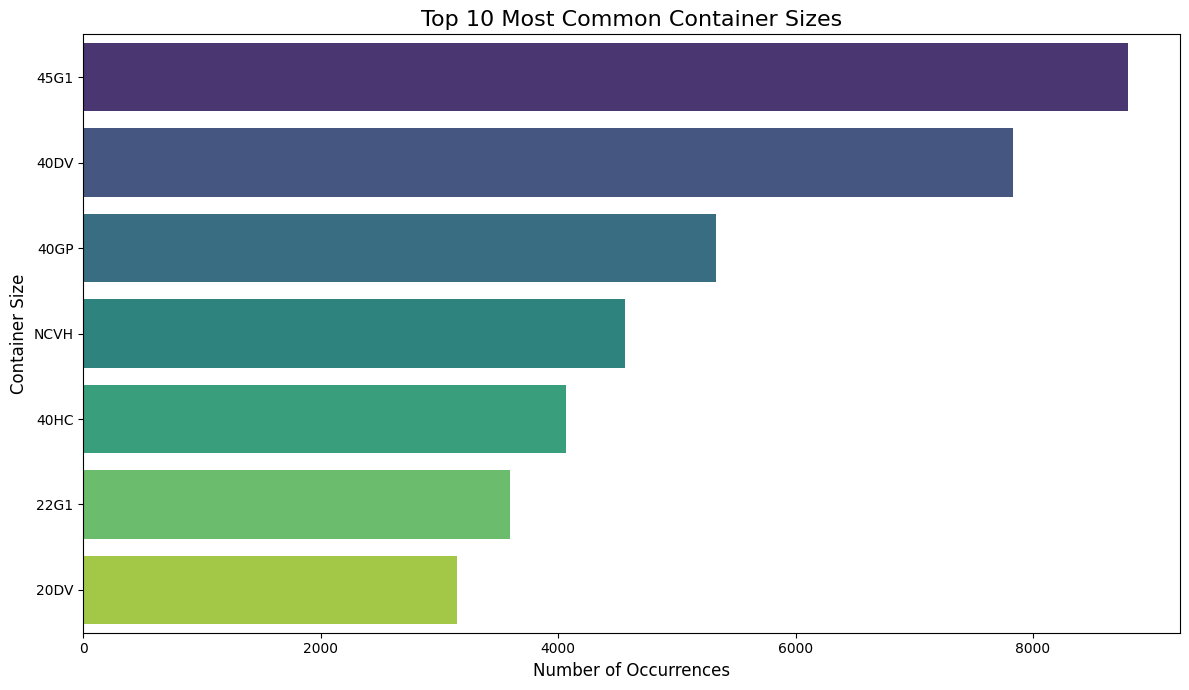

In [ ]:
# 9. Plot the most common container size
# Exclude 'None' values as they represent missing or non-containerized shipments
container_sizes = df[df['Container_Size'] != 'None']['Container_Size'].value_counts().nlargest(7)

plt.figure(figsize=(12, 7))
sns.barplot(x=container_sizes.values, y=container_sizes.index, palette='viridis')
plt.title('Top 10 Most Common Container Sizes', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Container Size', fontsize=12)
plt.tight_layout()
plt.savefig('top_container_sizes.png')
plt.show()
plt.close()

## Correlations and Regression

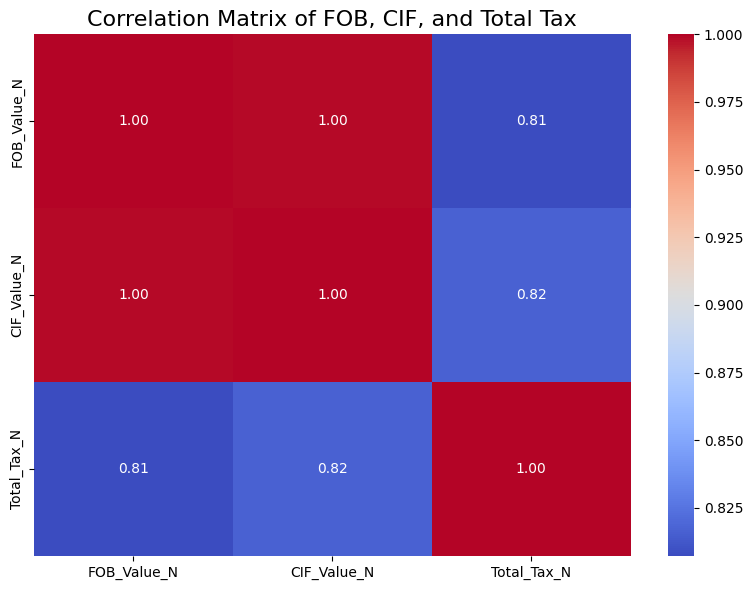

In [ ]:
# 10. Correlation between FOB value, CIF value and Total Tax
correlation_subset = df[['FOB_Value_N', 'CIF_Value_N', 'Total_Tax_N']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of FOB, CIF, and Total Tax', fontsize=16)
plt.tight_layout()
plt.savefig('fob_cif_tax_correlation.png')
plt.show()
plt.close()

### **Key Insights**

1. From the analysis, **CIF value (Cost + Insurance + Freight)** showed the strongest positive correlation with **tax value**, which makes sense because import duties are often calculated based on CIF. **FOB value (Free on Board)** was also positively related to tax, but slightly weaker, since it **excludes freight and insurance costs.**

2. Interestingly, the ***difference between CIF and FOB*** (essentially freight + insurance) had a **small but still measurable influence** — suggesting that these extra costs can ***slightly affect total tax*** but aren’t the main driver.

3. In short: ***higher CIF*** generally means ***higher tax***, FOB contributes similarly but to a **lesser extent**, and the **tax-to-value ratio** is the **most critical factor** in determining the **final tax amount.**